In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import pyfolio as pf

In [28]:
class backtesting_crossover:
    def __init__(self,ticker,start_date,end_date,ma_short,ma_long):
        self.ticker=ticker
        self.start_date=start_date
        self.end_date=end_date
        self.ma_short= ma_short
        self.ma_long=ma_long
        
        self.fetch_data()
        self.indicators()
        self.signals()
        self.position()
        self.returns()
    
    def fetch_data(self):
        self.df=yf.download(self.ticker,self.start_date,self.end_date)
        
    def indicators(self):
        self.df['ma_short']=self.df['Adj Close'].rolling(window=self.ma_short,center= False).mean()
        self.df['ma_long']=self.df['Adj Close'].rolling(window=self.ma_long,center=False).mean()
        self.df['ma_short_prev']=self.df['ma_short'].shift(1)
        self.df['ma_long_prev']= self.df['ma_long'].shift(1)
        self.df.dropna(inplace=True)
    
    def signals(self):
        self.df['signal']=np.where((self.df['ma_short']>self.df['ma_long'])&
                                  (self.df['ma_short_prev']<self.df['ma_long_prev']),1,0)
        self.df['signal']=np.where((self.df['ma_short']<self.df['ma_long'])&
                                  (self.df['ma_short_prev']>self.df['ma_long_prev']),-1,self.df['signal'])
    
    def position(self):
        self.df['position']=self.df['signal'].replace(to_replace=0,method='ffill')
    
    def returns(self):
        self.df['bnh_returns']=np.log(self.df['Adj Close']/self.df['Adj Close'].shift(1))
        self.df['strategy_return']=self.df['bnh_returns']*self.df['position'].shift(1)
        print('total returns:',self.df['strategy_return'].cumsum()[-1])
        return self.df['strategy_return'].cumsum()[-1]
        print(self.df.columns)
    
    def analysis(self):
        self.df[['ma_short','ma_long', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()

        # A plot to check how the strategy strategy performs relative to buy & hold
        self.df[['bnh_returns','strategy_return']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & hold' vs 'crossover strategy' cumulative returns")
        plt.show()
    
        pf.create_simple_tear_sheet(self.df['strategy_return'])
        

In [14]:
#creating a child class
start1= dt.datetime(2012,1,2)
end1= dt.datetime.now().date()


In [29]:
NSE= backtesting_crossover('^NSEI', start1, end1, 5, 15)#seems that crossover is not performinig that well

[*********************100%***********************]  1 of 1 completed
total returns: 0.1360143459385855


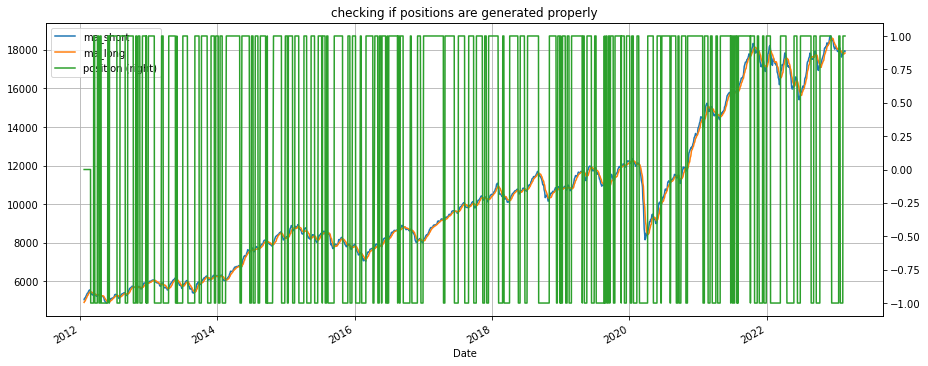

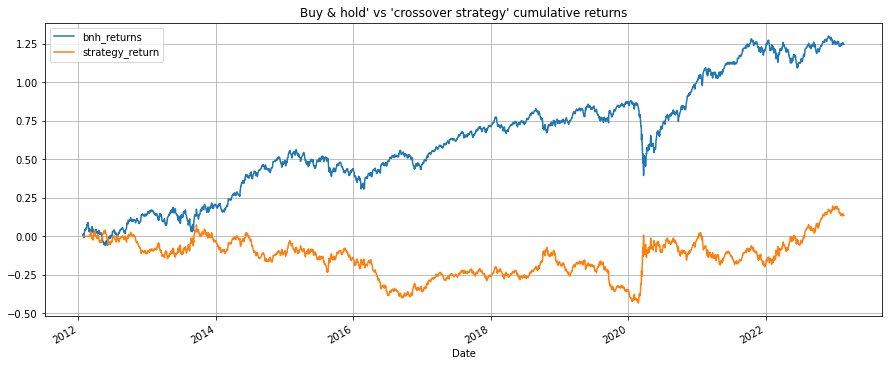

Start date,2012-01-24
End date,2023-02-21
Total months,129
,Backtest
Annual return,-0.2%
Cumulative returns,-1.9%
Annual volatility,17.0%
Sharpe ratio,0.07
Calmar ratio,-0.00
Stability,0.15
Max drawdown,-43.2%


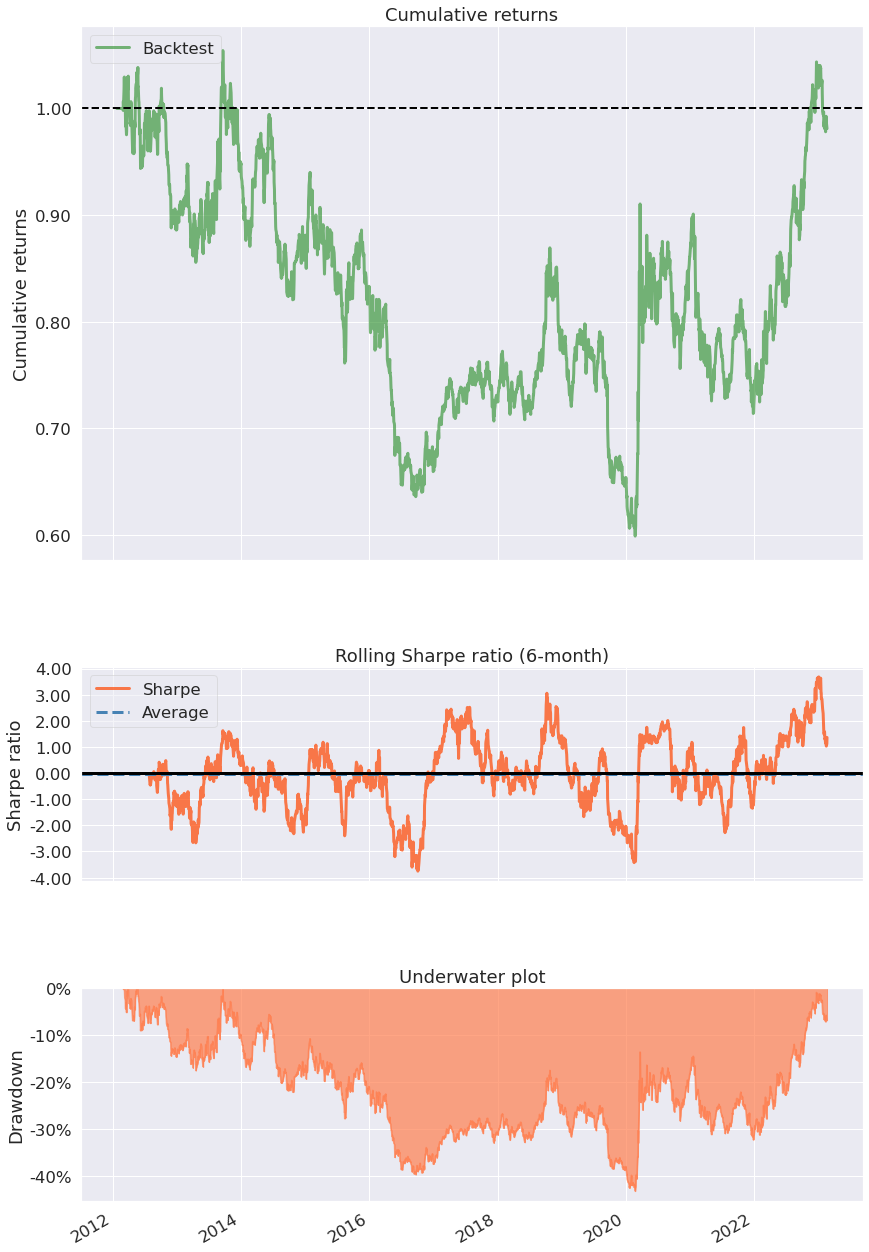

In [30]:
#lets check the analysis what we can find
NSE.analysis()

In [27]:
NSE.df

,Open,High,Low,Close,Adj Close,Volume,ma_short,ma_long,ma_short_prev,ma_long_prev,signal,position,bnh_returns,strategy_return
Date,,,,,,,,,,,,,,
2012-01-24,5064.799805,5141.049805,5049.799805,5127.350098,5127.350098,0,5039.279980,4896.123307,5007.269922,4871.986621,0,0,NaN,NaN
2012-01-25,5151.500000,5174.149902,5130.250000,5158.299805,5158.299805,0,5079.779980,4923.366634,5039.279980,4896.123307,0,0,0.006018,0.000000
2012-01-27,5216.750000,5217.000000,5162.399902,5204.700195,5204.700195,0,5117.040039,4953.683301,5079.779980,4923.366634,0,0,0.008955,0.000000
2012-01-30,5163.549805,5166.149902,5076.700195,5087.299805,5087.299805,0,5124.779980,4975.896615,5117.040039,4953.683301,0,0,-0.022815,-0.000000
2012-01-31,5125.250000,5215.399902,5120.149902,5199.250000,5199.250000,0,5155.379980,5006.326628,5124.779980,4975.896615,0,0,0.021767,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-15,17896.599609,18034.099609,17853.800781,18015.849609,18015.849609,229300,17893.309766,17780.833203,17864.479687,17787.663281,0,1,0.004785,0.004785
2023-02-16,18094.750000,18134.750000,18000.650391,18035.849609,18035.849609,230200,17921.789844,17790.426563,17893.309766,17780.833203,0,1,0.001110,0.001110
2023-02-17,17974.849609,18034.250000,17884.599609,17944.199219,17944.199219,208100,17939.329688,17813.083203,17921.789844,17790.426563,0,1,-0.005095,-0.005095


In [33]:
#now lets create a child class with exponetial moving average
class backtesting_EMA_crossover(backtesting_crossover):
    def indicator(self):
        self.df['ma_short']=self.df['Adj Close'].ewm(span=self.ma_short,adjust=False).mean()
        self.df['ma_long']=self.df['Adj Close'].ewm(span= self.ma_long,adjust=False).mean()
        self.df['ma_short_prev']= self.df['ma_short'].shift(1)
        self.df['ma_long_prev']= self.df['ma_long'].shift(1)
        self.df.dropna(inplace=True)
    
    @staticmethod
    def date_of_backtest():
        print('date of backtest:',dt.datetime.now().date())
    
    @classmethod
    def about_this_backtest(cls):
        print('Strategy Type: Short Long EWM crossover. ')

In [39]:
#now lets see how EMA will perform on prev data set 
nse_ema= backtesting_EMA_crossover('^NSEI', start1, end1, 3, 15)


[*********************100%***********************]  1 of 1 completed
total returns: 0.19362321079406994


In [40]:
#its doesnt seems like working lest check on mutiple assest and with mutiple paramenters
fast_ma_list=[5,10,15,20]
slow_ma_list =[25,50,100]
 
fast_ma=[]
slow_ma=[]
net_returns=[]

for i in fast_ma_list:
    for j in slow_ma_list:
        print('for',i,j)
        a= backtesting_crossover('AAPL',start1,end1,i ,j)
        fast_ma.append(i)
        slow_ma.append(j)
        net_returns.append(a.returns())

for 5 25
[*********************100%***********************]  1 of 1 completed
total returns: 2.051605032182462
total returns: 2.051605032182462
for 5 50
[*********************100%***********************]  1 of 1 completed
total returns: 1.3641071043329889
total returns: 1.3641071043329889
for 5 100
[*********************100%***********************]  1 of 1 completed
total returns: 1.0503153777336136
total returns: 1.0503153777336136
for 10 25
[*********************100%***********************]  1 of 1 completed
total returns: 1.5316833531488492
total returns: 1.5316833531488492
for 10 50
[*********************100%***********************]  1 of 1 completed
total returns: 1.053043712340355
total returns: 1.053043712340355
for 10 100
[*********************100%***********************]  1 of 1 completed
total returns: 0.29756158874374716
total returns: 0.29756158874374716
for 15 25
[*********************100%***********************]  1 of 1 completed
total returns: 1.3150765304310938
total re

In [43]:
#lets convert the results in to the data frame
results = pd.DataFrame({'fast_ma':fast_ma,'slow_ma': slow_ma,'net_returns':net_returns})
results

,fast_ma,slow_ma,net_returns
0,5,25,2.051605
1,5,50,1.364107
2,5,100,1.050315
3,10,25,1.531683
4,10,50,1.053044
5,10,100,0.297562
6,15,25,1.315077
7,15,50,0.943864
8,15,100,0.435241
9,20,25,1.191361


In [45]:
#lets sort and find the best parameter 
results.sort_values(by='net_returns',ascending=False)#now its looks great

,fast_ma,slow_ma,net_returns
0,5,25,2.051605
3,10,25,1.531683
1,5,50,1.364107
6,15,25,1.315077
9,20,25,1.191361
4,10,50,1.053044
2,5,100,1.050315
7,15,50,0.943864
11,20,100,0.645858
8,15,100,0.435241


In [44]:
#the above result gave use the wider picture of the parameter that we acquire maximum returns
#now lets check it for mutiple assets on INdian Stock market


In [48]:
stock_list = [   'BAJFINANCE.NS',
                 'BAJAJFINSV.NS',
                 'BPCL.NS',
                 'BHARTIARTL.NS',
                 'BRITANNIA.NS',
                 'CIPLA.NS',
                 'COALINDIA.NS',
                 'DRREDDY.NS',
                 'EICHERMOT.NS',
                 'GAIL.NS',
                 'GRASIM.NS',
                 'MANAPPURAM.NS']


stock_name=[]
net_returns=[]



In [52]:
for stock in stock_list:
    print('back testing result for',stock)
    a = backtesting_crossover(stock, start1, end1, 5, 25)
    stock_name.append(stock)
    net_returns.append(a.returns())
    print('\n')

back testing result for BAJFINANCE.NS
[*********************100%***********************]  1 of 1 completed
total returns: 2.934441725914575
total returns: 2.934441725914575


back testing result for BAJAJFINSV.NS
[*********************100%***********************]  1 of 1 completed
total returns: 1.6403944530124437
total returns: 1.6403944530124437


back testing result for BPCL.NS
[*********************100%***********************]  1 of 1 completed
total returns: -0.5304157745709642
total returns: -0.5304157745709642


back testing result for BHARTIARTL.NS
[*********************100%***********************]  1 of 1 completed
total returns: -0.2707658255579498
total returns: -0.2707658255579498


back testing result for BRITANNIA.NS
[*********************100%***********************]  1 of 1 completed
total returns: 2.0882869776905886
total returns: 2.0882869776905886


back testing result for CIPLA.NS
[*********************100%***********************]  1 of 1 completed
total returns: -0.

In [53]:
results = pd.DataFrame({'Stock':stock_name,'net_returns':net_returns})
results

,Stock,net_returns
0,BAJFINANCE.NS,2.934442
1,BAJAJFINSV.NS,1.640394
2,BPCL.NS,-0.530416
3,BHARTIARTL.NS,-0.270766
4,BRITANNIA.NS,2.088287
5,CIPLA.NS,-0.194054
6,COALINDIA.NS,-1.071569
7,DRREDDY.NS,-1.292639
8,EICHERMOT.NS,0.410130
9,GAIL.NS,-1.379177


In [54]:
# Sorting to find the best stocks to apply the strategy
results.sort_values(by='net_returns',ascending=False)

,Stock,net_returns
0,BAJFINANCE.NS,2.934442
11,MANAPPURAM.NS,2.377907
10,GRASIM.NS,2.237812
4,BRITANNIA.NS,2.088287
1,BAJAJFINSV.NS,1.640394
8,EICHERMOT.NS,0.410130
5,CIPLA.NS,-0.194054
3,BHARTIARTL.NS,-0.270766
2,BPCL.NS,-0.530416
6,COALINDIA.NS,-1.071569
